<a href="https://colab.research.google.com/github/Amirhosseinpoor/AI_Course/blob/main/HW3/mini_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# تعریف مثلث
A = np.array([1, 0])
B = np.array([2, 2])
C = np.array([3, 0])

def area(p1, p2, p3):
    return abs(p1[0]*(p2[1]-p3[1]) + p2[0]*(p3[1]-p1[1]) + p3[0]*(p1[1]-p2[1])) / 2

def is_inside_triangle(P):
    A_total = area(A, B, C)
    A1 = area(P, B, C)
    A2 = area(A, P, C)
    A3 = area(A, B, P)
    return abs(A_total - (A1 + A2 + A3)) < 1e-5

num_samples = 2000
X = np.random.uniform(low=-1, high=4, size=(num_samples, 2))
y = np.array([1 if is_inside_triangle(point) else 0 for point in X])

model = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=500,activation='tanh')


model.fit(X, y)




/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(16, 16), max_iter=500)

Text(0.5, 1.0, 'with tanh')

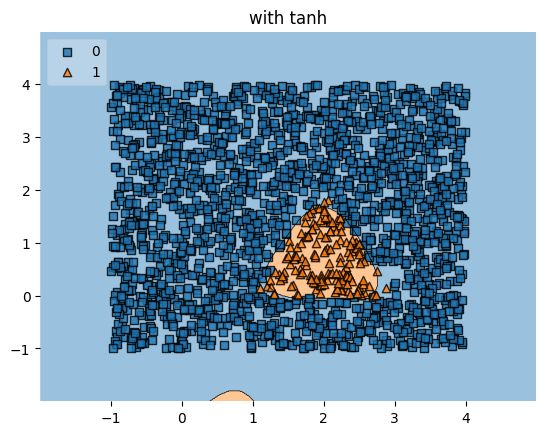

In [17]:
from mlxtend.plotting import plot_decision_regions

plt = plot_decision_regions(X, y, clf=model, legend=2)
plt.set_title('with tanh')


Question 3

In [18]:
import numpy as np
from PIL import Image, ImageDraw
import random
import os
import matplotlib.pyplot as plt


!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip



def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation



from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
# generateNoisyImages()


def convertImageToBinary(path: str, factor: int=100, output_path : str = None):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.
    factor (int, optional):
        Adjusts the binarization threshold (Default: 100).
    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    with Image.open(path) as img:
        image = img.convert("RGB")

    img_array = np.array(image)
    intensity = img_array.sum(axis=2)
    threshold = ((255 + factor) // 2) * 3
    binary_representation = np.where(intensity > threshold, -1, 1).flatten()
    if output_path:
      binarized_array = np.where(intensity > threshold, 255, 0)
      binarized_array = np.stack([binarized_array]*3, axis=-1)
      binarized_image = Image.fromarray(binarized_array.astype("uint8"), "RGB")
      binarized_image.save(output_path, 'JPEG')
      return binary_representation
    else:  return binary_representation




def getNoisyBinaryImage(input_path, output_path, noise_factor=10000000, random_state=None):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
        noise_factor (int): Amplitude of noise (default: 10,000,000).
        random_state (int/None): Seed for reproducibility. If None, uses true randomness.
    """
    with Image.open(input_path) as img:
        image = img.convert("RGB")

    img_array = np.array(image)
    if random_state is not None:
        np.random.seed(random_state)

    rand = np.random.randint(-noise_factor, noise_factor, img.size[0:2])
    red = img_array[:, :, 0] + rand
    red[red > 255] = 255
    red[red < 0] = 0
    green = img_array[:, :, 1] + rand
    green[green > 255] = 255
    green[green < 0] = 0
    blue = img_array[:, :, 2] + rand
    blue[blue > 255] = 255
    blue[blue < 0] = 0
    noise_image = np.stack((red, green, blue), axis=2)
    noise_image = Image.fromarray(noise_image.astype("uint8"), "RGB")
    noise_image.save(output_path, "JPEG")



def generateNoisyImages(noise_factor=10000000, random_state = None):
    image_paths = [
        "1.jpg",
        "2.jpg",
        "3.jpg",
        "4.jpg",
        "5.jpg"
    ]

    os.makedirs('noisy', exist_ok=True)
    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"noisy/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path, noise_factor, random_state)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")


def BinarytoImage(binary_img):
    binary_img = np.array(binary_img)
    img = np.where(binary_img == -1, 255, 0)
    img = img.reshape(96,96)
    img = np.stack([img]*3, axis=2)
    img = Image.fromarray(img.astype("uint8"), "RGB")
    return img


Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 17.4MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [20]:
class HammingNetwork:
    def __init__(self, patterns):
        self.patterns = np.array([p for p in patterns])
        self.n_classes = len(patterns)

    def predict(self, x_noisy):
        similarities = np.dot(self.patterns, x_noisy)
        return self.patterns[np.argmax(similarities)]

In [21]:
images = [convertImageToBinary(f'{i}.jpg') for i in range(1,6)]
model = HammingNetwork(images)

In [22]:
generateNoisyImages(1100, 93)
paths = [f'noisy/noisy{i}.jpg' for i in range(1,6)]
noise = [convertImageToBinary(f'{i}') for i in paths]

Noisy image for 1.jpg generated and saved as noisy/noisy1.jpg
Noisy image for 2.jpg generated and saved as noisy/noisy2.jpg
Noisy image for 3.jpg generated and saved as noisy/noisy3.jpg
Noisy image for 4.jpg generated and saved as noisy/noisy4.jpg
Noisy image for 5.jpg generated and saved as noisy/noisy5.jpg


In [23]:
def show_images(noise, predictions):
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    for i in range(5):
        n = noise[i]
        p = predictions[i]
        axes[0, i].imshow(n, cmap='gray')
        axes[0, i].set_title(f"Noisy {i+1}")
        axes[0, i].axis('off')

        axes[1, i].imshow(p, cmap='gray')
        axes[1, i].set_title(f"Prediction {i+1}")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

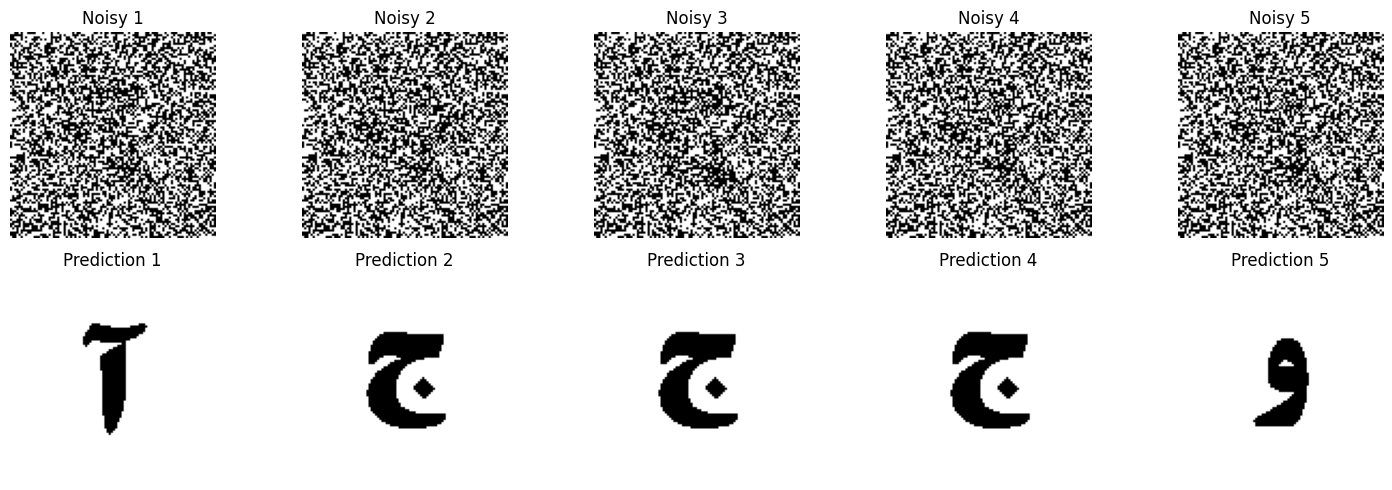

In [24]:
per = [model.predict(noise[i]) for i in range(5)]
noise_img = [BinarytoImage(noise[i]) for i in range(5)]
per_img = [BinarytoImage(per[i]) for i in range(5)]
show_images(noise_img, per_img)

In [26]:
def missimage(input_path,output_path, percent=20, factor = 100, random_state=None):
    with Image.open(input_path) as img:
        image = img.convert("RGB")

    img_array = np.array(image)
    intensity = img_array.sum(axis=2)
    threshold = ((255 + factor) // 2) * 3
    blackpix = np.where(intensity < threshold)
    number = round(len(blackpix[0])*percent/100)
    if random_state is not None:
        np.random.seed(random_state)

    pixels_to_flip = np.random.choice(range(len(blackpix[0])), size=number, replace=False)
    img_array[blackpix[0][pixels_to_flip], blackpix[1][pixels_to_flip]] = 255
    img = Image.fromarray(img_array.astype("uint8"), "RGB")
    img.save(output_path, "JPEG")

In [27]:
def generatemissimage(percent=20, factor = 100, random_state=None):
    image_paths = [
        "1.jpg",
        "2.jpg",
        "3.jpg",
        "4.jpg",
        "5.jpg"
    ]
    os.makedirs('miss', exist_ok=True)
    for i, image_path in enumerate(image_paths, start=1):
        miss_image_path = f"miss/miss{i}.jpg"
        missimage(image_path, miss_image_path,percent, factor, random_state)
        print(f"Miss image for {image_path} generated and saved as {miss_image_path}")

In [28]:
generatemissimage(70,100,93)
paths=[f'miss/miss{i}.jpg' for i in range(1,6)]
miss=[convertImageToBinary(i) for i in paths]

Miss image for 1.jpg generated and saved as miss/miss1.jpg
Miss image for 2.jpg generated and saved as miss/miss2.jpg
Miss image for 3.jpg generated and saved as miss/miss3.jpg
Miss image for 4.jpg generated and saved as miss/miss4.jpg
Miss image for 5.jpg generated and saved as miss/miss5.jpg


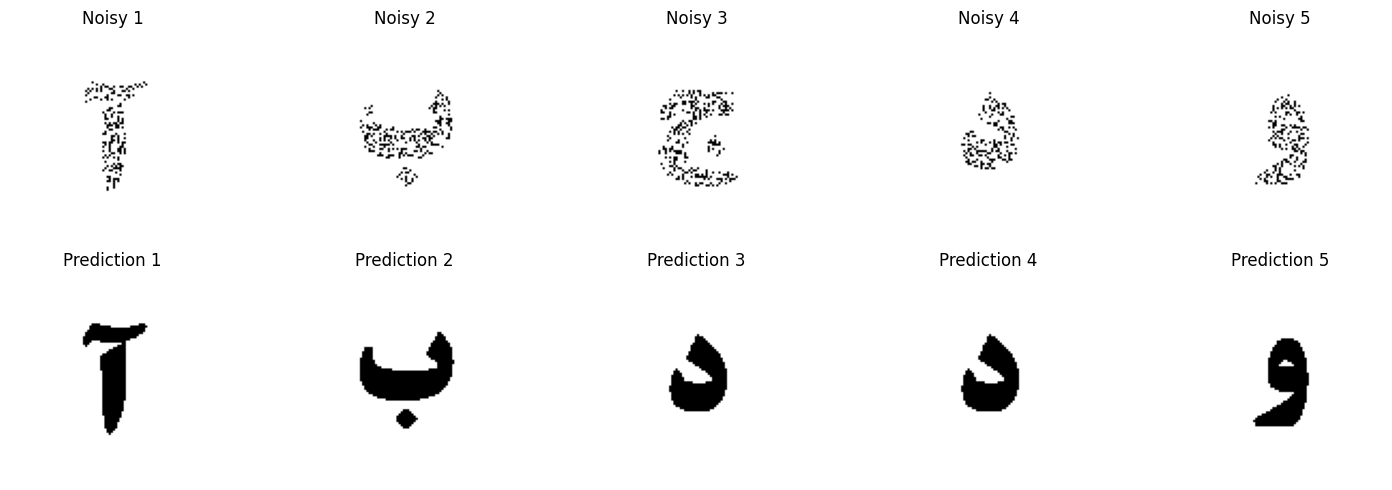

In [29]:
per = [model.predict(miss[i]) for i in range(5)]
miss_img = [BinarytoImage(miss[i]) for i in range(5)]
per_img = [BinarytoImage(per[i]) for i in range(5)]
show_images(miss_img, per_img)

In [30]:
class HammingNetwork:
    def __init__(self, patterns):
        self.patterns = np.array([p for p in patterns])
        self.n_classes = len(patterns)

    def masked_dot(self, a, b, mask):
        return np.dot(a[mask], b[mask])

    def predict(self, x_noisy):
        mask = x_noisy != -1
        similarities = [self.masked_dot(p, x_noisy, mask) for p in self.patterns]
        return self.patterns[np.argmax(similarities)]

model = HammingNetwork(images)

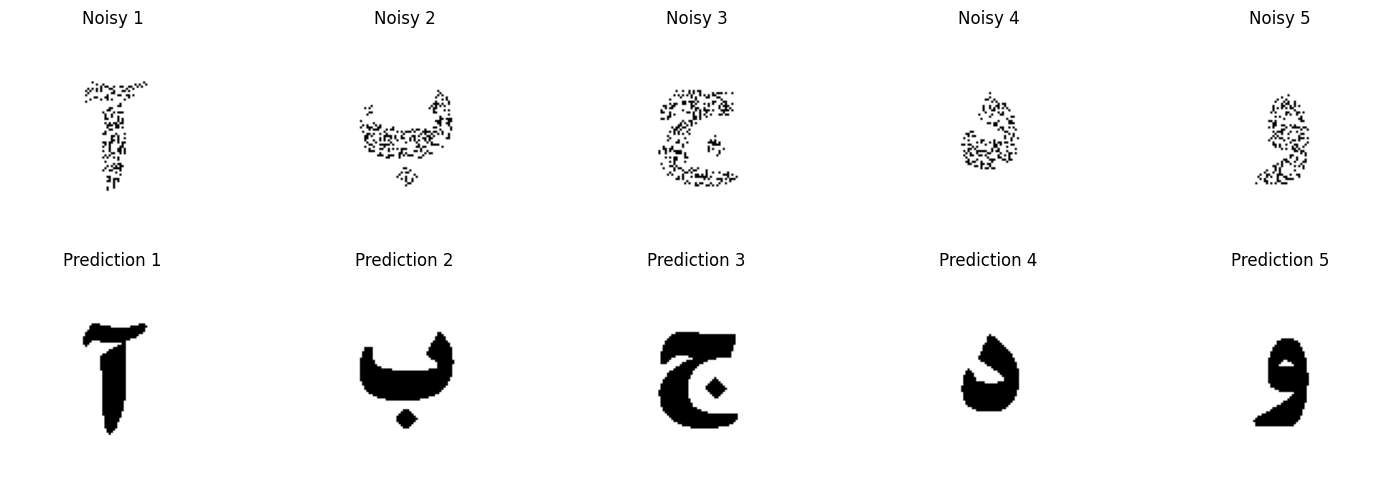

In [31]:
per = [model.predict(miss[i]) for i in range(5)]
miss_img = [BinarytoImage(miss[i]) for i in range(5)]
per_img = [BinarytoImage(per[i]) for i in range(5)]
show_images(miss_img, per_img)